In [44]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd 

In [45]:
def Scale_foil(cord,scale):
    return cord*scale/cord.max()

In [46]:
def plot_foil(x,y):
    plt.plot(x,y)
# plt.ylim((-10,20))
    plt.yticks(np.arange(-10,15,2.5))
    plt.xlim((0,150))
    plt.xticks(np.arange(-10,170,10))
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    

# Read Files


In [47]:
X = []
Y = []
with open("MH61_NX.txt","r") as f:
    read = f.readlines()
    for i in read:
        
        # i.strip()
        list = i.split()
        X.append(float(list[0]))
        Y.append(float(list[1]))
        # print(list)
f.close()

# Coordinate Check

In [48]:
X_cord = np.array(X)
Y_cord = np.array(Y)
print(X_cord.shape)
print(Y_cord.shape)

(240,)
(240,)


In [49]:
X_cord_149 = Scale_foil(X_cord,149)

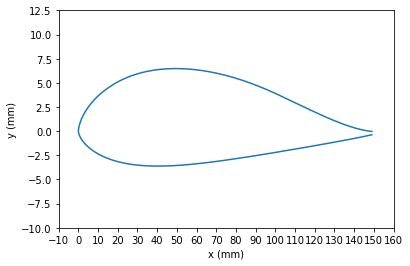

In [50]:
plot_foil(X_cord_149,Y_cord)

In [51]:
## Examine the max chord
print(f"The max thickness is {Y_cord.max()} at { np.round(Y_cord.argmax()/Y_cord.shape[0]*100)}%")
print(f"Length of Chord is {X_cord_149.max()} mm")

The max thickness is 6.474 at 31.0%
Length of Chord is 149.0 mm


# Pressure point design

In [52]:
# x/c location of pressure tap
xc = [0,0.027,0.047,0.095,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
xc = [0,0.027,0.047,0.095,0.16,0.2,0.24,0.3,0.35,0.4,0.5,0.6,0.7,0.8]

xc = np.array(xc) 
xc.shape

(14,)

In [53]:
df_bot = pd.read_excel("MH61_098m_3_half_bot.xlsx",header=None)
df_top = pd.read_excel("MH61_098m_3_half_top.xlsx",header=None)

In [54]:
df_bot_np = df_bot.to_numpy()
df_top_np = df_top.to_numpy()

In [55]:
df_bot_np.shape

(124, 3)

In [56]:
df_bot_np.max()

0.98

## Chopped Profile

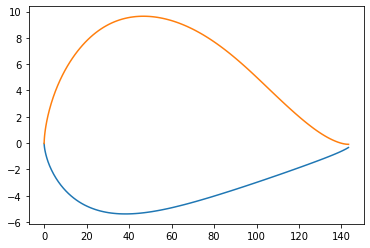

In [57]:
chop = 3
plt.plot(df_bot_np[:-chop,0]*149,df_bot_np[:-chop,-1]*149)
plt.plot(df_top_np[chop:,0]*149,df_top_np[chop:,-1]*149)

In [58]:
x_bot = df_bot_np[:-chop,0]*149/0.98
y_bot = df_bot_np[:-chop,-1]*149/0.98

x_top = df_top_np[chop:,0]*149/0.98
y_top = df_top_np[chop:,-1]*149/0.98

In [59]:
x_tap_bot = xc * df_bot_np[:,0].max()
print(x_tap_bot)
Loc_bot = []
for i in range(len(xc)):
    loc = np.argmax( np.abs(x_tap_bot[i]-df_bot_np[:,0])<=0.005)
    Loc_bot.append(loc)

Loc_x_bot = np.array(Loc_bot)
print(Loc_x_bot)
tap_y_bot = df_bot_np[:,-1][Loc_x_bot]
print(tap_y_bot)

[0.      0.02646 0.04606 0.0931  0.1568  0.196   0.2352  0.294   0.343
 0.392   0.49    0.588   0.686   0.784  ]
[ 0 10 13 19 26 31 36 43 48 54 65 77 88 99]
[-0.0001764 -0.0136906 -0.0197764 -0.028077  -0.0333592 -0.0352702
 -0.0360836 -0.0358582 -0.034986  -0.0333886 -0.0294392 -0.0243236
 -0.0192472 -0.0139258]


In [60]:
x_tap_top = xc * df_top_np[:,0].max()
print(x_tap_top)
Loc_top = []
for i in range(len(xc)):
    loc = np.argmax( np.abs(x_tap_top[i]-df_top_np[:,0])<=0.005)
    Loc_top.append(loc)

Loc_x_top = np.array(Loc_top)
print(Loc_x_top)
tap_y_top = df_top_np[:,-1][Loc_x_top]
print(tap_y_top)

[0.      0.02646 0.04606 0.0931  0.1568  0.196   0.2352  0.294   0.343
 0.392   0.49    0.588   0.686   0.784  ]
[120 114 111 105  98  93  88  81  76  70  58  47  35  24]
[0.0069776 0.0234808 0.032095  0.0451388 0.0552524 0.059927  0.0628964
 0.0646702 0.0645232 0.0629846 0.0559776 0.0454524 0.030625  0.0163856]


In [61]:
tap_y_bot[0] = 0 
tap_y_top[0] = 0 


In [62]:
tap_y_bot[-2]*0.40 * 149/0.98

-1.1705440000000005

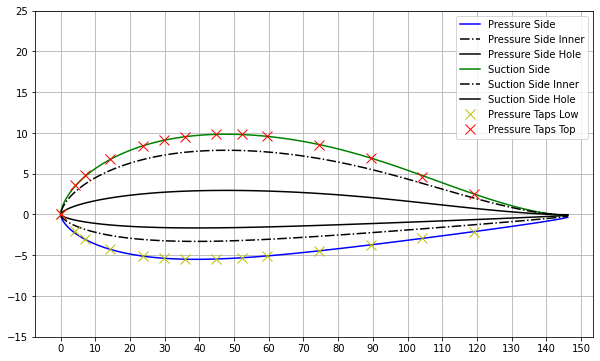

In [63]:
plt.figure(figsize=(10,6))
plt.plot(x_bot,y_bot,"b",label="Pressure Side")

plt.plot(x_bot,y_bot*0.6,"k-.",label="Pressure Side Inner")
plt.plot(x_bot,y_bot*0.3,"k-",label="Pressure Side Hole")

plt.plot(x_top,y_top,"g",label="Suction Side")
plt.plot(x_top,y_top*0.8,"k-.",label="Suction Side Inner")
plt.plot(x_top,y_top*0.3,"k-",label="Suction Side Hole")

plt.plot(x_tap_bot*149/0.98,tap_y_bot*149/0.98,"yx",ms =10,label="Pressure Taps Low")
plt.plot(x_tap_top*149/0.98,tap_y_top*149/0.98,"rx",ms=10,label="Pressure Taps Top")
plt.xticks(range(0,160,10))
plt.yticks(range(-15,30,5))
plt.legend()
plt.grid()
plt.show()

In [65]:
x_coordinate = np.concatenate([x_bot,x_top])
y_coordinate = np.concatenate([y_bot,y_top])
print(x_bot.shape)
print(x_top.shape)
print(x_coordinate.shape)
print(y_coordinate.shape)

(121,)
(124,)
(245,)
(245,)


In [66]:
with open("MH61_Ug.txt","w") as airfoil:
    for x,y in zip(np.round(x_coordinate,3),np.round(y_coordinate,3)):
        airfoil.write("{}\t{}\t{}\n".format(x,y,0))
airfoil.close()

In [67]:
with open("MH61_Up_pressure_tap_take2.txt","w") as ptap:
    i = 1
    for x,y in zip(x_tap_top,tap_y_top):

        ptap.write("{}\t{}\t{}\n".format(np.round(x*149/0.98,3),np.round(y*149/0.98,3),5*(-1)**i))
        i+=1
ptap.close()

In [68]:
with open("MH61_Low_pressure_tap_take2.txt","w") as ptap:
    i = 2
    for x,y in zip(x_tap_bot,tap_y_bot):

        ptap.write("{}\t{}\t{}\n".format(np.round(x*149/0.98,3),np.round(y*149/0.98,3),5*(-1)**i))
        i+=1
ptap.close()

In [69]:
x_coordinate_inner = np.concatenate([x_bot,x_top])
y_coordinate_inner = np.concatenate([y_bot*0.6,y_top*0.8])

In [70]:
with open("MH61_Ug_Inner.txt","w") as airfoil:
    for x,y in zip(np.round(x_coordinate_inner,3),np.round(y_coordinate_inner,3)):
        airfoil.write("{}\t{}\t{}\n".format(x,y,0))
airfoil.close()

In [71]:
x_coordinate_hole = np.concatenate([x_bot,x_top])
y_coordinate_hole = np.concatenate([y_bot*0.3,y_top*0.3])

In [ ]:
with open("MH61_Ug_Hole.txt","w") as airfoil:
    for x,y in zip(np.round(x_coordinate_hole,3),np.round(y_coordinate_hole,3)):
        airfoil.write("{}\t{}\t{}\n".format(x,y,0))
airfoil.close()